# **TRABALHO DE CONCLUSÃO DE CURSO: Classificador de imagens de Câncer de Pele**


Integrantes:
* Aline Cristini Pereira da Silva
* Camila da Silva Rodrigues
* Rafael Gimenes Leite

## **PROBLEMA**

Melanoma é um tipo de câncer que se origina de células produtoras do pigmento que determina a cor da pele. Este tipo de câncer é especialmente perigoso devido a alta capacidade de se espalhar para outros órgãos do corpo. De fato, estima-se que o número de mortes provocadas por melanomas (1.547) quase equivale a de todos os outros tipos de câncer de pele. Todavia, se diagnosticado em estágio inicial, as chances de cura são consideráveis. 
O diagnóstico precoce começa com a identificação de lesões suspeitas, feita visualmente pelo próprio paciente. Diante deste quadro, e ainda considerando que o grupo de risco da doença inclui pessoas com grande quantidade de pintas pelo corpo, a identificação visual de lesões suspeitas exige bastante atenção e cuidado. Por isso, a identificação automática de lesões suspeitas pode trazer  benefícios para o diagnóstico precoce da doença.

## **OBJETIVO**

O objetivo deste trabalho é criar um modelo utilizando técnicas de visão computacional para classificação de fotografias dermatoscópicas de lesões na pele entre malignas (melanomas) e benignas. 
De fato, esta tarefa faz parte dos desafios propostos pelo ISIC (International Skin Imaging Collaboration), porem nós não vamos usar as diretrizes do escopo do desafio, apenas vamos usar a base deles, pois os desafios mudam a cada ano com regras.


## **DATASET**

Utilizamos a base de imagens dermatoscópicas do ISIC (International Skin Image Collaboration), disponível em https://isic-archive.com/#images.

Os metadados estão em formato JSON e são requisitadas via API da ISIC.




### **PARTE 1 - Leitura de Arquivos**

Iremos iniciar o nosso kernel com as primeiras bibliotecas que vamos utilizar.

Estamos utilizando a biblioteca **pandas** para as análises fundamentais em nosso trabalho, assim como, leitura de arquivos,tratativa de linhas e colunas, criação de dataframes, entre outros.

A biblioteca **Numpy** está sendo utilizada para suporte à matrizes multidimensionais, além de nos permitir utilizar as funções matemáticas para manipulação de matrizes.

A biblioteca **Matplotlib** é uma biblioteca utilizada para plotar os mais variados tipos de gráficos e o **Seaborn** utiliza o Matplotlib como base e fornece funções simples de usar para criação de gráficos que seriam complexos apenas com o Matplotlib.

O módulo **Pyplot** da biblioteca *Matplotlib* destina-se principalmente a plotagens interativas, neste kernel, utilizamos para fazer alguns plots básicos do nosso dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/arquivo_final_1.csv")

In [3]:
df.head()

,image_id,image_name,created,dataset_id,dataset_name,width,height,age,sex,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,updated
0,5436e3abbae478396759f0cf,ISIC_0000000,2014-10-09T19:36:11.989000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,55,female,benign,nevus,None,True,2015-02-23T02:48:17.495000+00:00
1,5436e3acbae478396759f0d1,ISIC_0000001,2014-10-09T19:36:12.070000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,30,female,benign,nevus,None,True,2015-02-23T02:48:27.455000+00:00
2,5436e3acbae478396759f0d3,ISIC_0000002,2014-10-09T19:36:12.152000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,60,female,malignant,melanoma,histopathology,True,2015-02-23T02:48:37.249000+00:00
3,5436e3acbae478396759f0d5,ISIC_0000003,2014-10-09T19:36:12.233000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,30,male,benign,nevus,None,True,2015-02-23T02:48:46.021000+00:00
4,5436e3acbae478396759f0d7,ISIC_0000004,2014-10-09T19:36:12.315000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,80,male,malignant,melanoma,histopathology,True,2015-02-23T02:48:57.303000+00:00


In [4]:
# Remove registros duplicados
df.drop_duplicates(keep=False,inplace=True)

In [5]:
# Demonstra uma estatística geral do nosso dataset
df.describe(exclude=[np.number])

,image_id,image_name,created,dataset_id,dataset_name,width,height,age,sex,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,updated
count,23236,23236,23236,23236,23236,23236,23236,23178,23231,21148,23053,23229,23053,23236
unique,23235,23234,23234,12,12,156,146,20,4,7,20,6,4,23235
top,558d64f8bae47801cf735680,ISIC_0011400,2014-10-09T19:36:25.191000+00:00,5aaf6f2a116597691367292e,HAM10000,600,450,15,male,benign,nevus,single image expert consensus,True,2015-02-23T13:12:40.228000+00:00
freq,2,2,2,9499,9499,9499,9499,7832,13354,18885,18107,10584,20334,2


In [6]:
# Padroniza os sexos do dataset
sexo = {'None':'Unknown','male':'Male','female':'Female'}
df['sex'] = df['sex'].map(sexo)
df.head()

,image_id,image_name,created,dataset_id,dataset_name,width,height,age,sex,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,updated
0,5436e3abbae478396759f0cf,ISIC_0000000,2014-10-09T19:36:11.989000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,55,Female,benign,nevus,None,True,2015-02-23T02:48:17.495000+00:00
1,5436e3acbae478396759f0d1,ISIC_0000001,2014-10-09T19:36:12.070000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,30,Female,benign,nevus,None,True,2015-02-23T02:48:27.455000+00:00
2,5436e3acbae478396759f0d3,ISIC_0000002,2014-10-09T19:36:12.152000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,60,Female,malignant,melanoma,histopathology,True,2015-02-23T02:48:37.249000+00:00
3,5436e3acbae478396759f0d5,ISIC_0000003,2014-10-09T19:36:12.233000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,30,Male,benign,nevus,None,True,2015-02-23T02:48:46.021000+00:00
4,5436e3acbae478396759f0d7,ISIC_0000004,2014-10-09T19:36:12.315000+00:00,5a2ecc5e1165975c945942a2,UDA-1,1022,767,80,Male,malignant,melanoma,histopathology,True,2015-02-23T02:48:57.303000+00:00


In [7]:
# Verifica se o dataset possui colunas com valores nulos
df.isnull().any()

image_id                  False
image_name                False
created                   False
dataset_id                False
dataset_name              False
width                     False
height                    False
age                        True
sex                        True
benign_malignant           True
diagnosis                  True
diagnosis_confirm_type     True
melanocytic                True
updated                   False
dtype: bool

In [8]:
# Armazena numa variável as linhas com valores faltantes
faltantes = df[df.isnull().any(axis=1)]
faltantes.head()

,image_id,image_name,created,dataset_id,dataset_name,width,height,age,sex,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,updated
11456,5592ac599fc3c13155a57a85,ISIC_0011409,2015-06-30T14:48:57.555000+00:00,5a2ecc5d1165975c9459427e,MSK-1,6628,4399,85,Male,benign,NaN,single image expert consensus,NaN,2015-09-03T12:24:51.361000+00:00
11460,5592ac639fc3c13155a57a99,ISIC_0011413,2015-06-30T14:49:07.543000+00:00,5a2ecc5d1165975c9459427e,MSK-1,6607,4399,85,Female,benign,NaN,single image expert consensus,NaN,2015-08-25T13:33:26.425000+00:00
11466,5592ac759fc3c13155a57ab7,ISIC_0011419,2015-06-30T14:49:25.063000+00:00,5a2ecc5d1165975c9459427e,MSK-1,6608,4399,85,Male,benign,NaN,single image expert consensus,NaN,2015-08-25T13:34:40.600000+00:00
11469,5592ac7d9fc3c13155a57ac6,ISIC_0011422,2015-06-30T14:49:33.688000+00:00,5a2ecc5d1165975c9459427e,MSK-1,6608,4399,85,Male,benign,NaN,single image expert consensus,NaN,2015-08-25T13:36:33.160000+00:00
11470,5592ac819fc3c13155a57acb,ISIC_0011423,2015-06-30T14:49:37.061000+00:00,5a2ecc5d1165975c9459427e,MSK-1,6628,4399,85,Male,benign,NaN,single image expert consensus,NaN,2015-08-25T13:36:50.495000+00:00


In [9]:
# Armazenamos na variável dfBM apenas os registros com classe benigno e maligno válido
dfBM = df.loc[(df['benign_malignant'] == 'benign') | (df['benign_malignant'] == 'malignant') ]


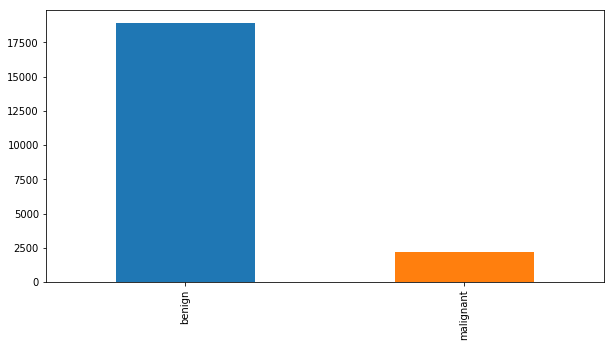

In [10]:
# Gráfico que apresenta como nosso dataset está desbalanceado entre as classes
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
dfBM['benign_malignant'].value_counts().plot(kind='bar', ax=ax1)

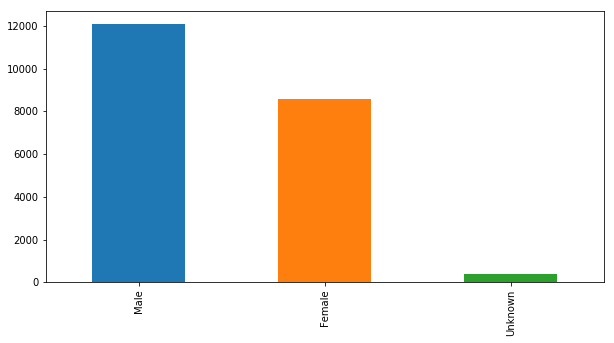

In [11]:
# Gráfico que apresenta a distribuição do dataset por sexo
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
dfBM['sex'].value_counts().plot(kind='bar', ax=ax1)

Separamos um dataset só com as informações de classe **benigno** e um dataset só com as informações da classe **maligno**.

In [12]:
dfB = dfBM = df.loc[(df['benign_malignant'] == 'benign') ]
dfM = dfBM = df.loc[(df['benign_malignant'] == 'malignant') ]

In [13]:
dfB.shape

(18885, 14)

In [14]:
dfM.shape

(2228, 14)

### **Parte 2 - Balanceamento do dataset**

Como vimos anteriormente, nosso dataset está muito desbalanceado, tendo uma diferença muito grande entre as classes.

Para facilitar a resolução, vamos balancear a classe de benigno tendo como base a quantidade de malignos (que é menor).


In [15]:
# Armazenamos os nomes das pastas das imagens de classe maligno
listaDatasetsM = dfM['dataset_name'].unique()

In [16]:
print(dfB['dataset_name'].unique())
print(dfM['dataset_name'].unique())

['UDA-1' 'SONIC' 'UDA-2' 'MSK-2' 'HAM10000' 'MSK-1' 'MSK-3' 'MSK-4'
 'MSK-5']
['UDA-1' 'UDA-2' 'MSK-2' 'MSK-1' 'MSK-3' 'MSK-4'
 '2018 JID Editorial Images' 'HAM10000']


In [17]:
dfB = dfB[dfB['dataset_name'].isin(listaDatasetsM)]

In [18]:
dfB.shape

(9559, 14)

In [19]:
print(dfB['dataset_name'].unique())
print(dfM['dataset_name'].unique())

['UDA-1' 'UDA-2' 'MSK-2' 'HAM10000' 'MSK-1' 'MSK-3' 'MSK-4']
['UDA-1' 'UDA-2' 'MSK-2' 'MSK-1' 'MSK-3' 'MSK-4'
 '2018 JID Editorial Images' 'HAM10000']


In [20]:
print(dfM.shape)

(2228, 14)


In [21]:
print(dfB.shape)

(9559, 14)


Nesta etapa, iremos pegar somentes as idades compatíveis, lembrando que queremos ter o mesmo número de Malignos e Benignos.
Para isso, iremos criar ranges de idades para realizarmos o balanceamento.

In [22]:
age_ranges = ["[{0} - {1})".format(age, age + 10) for age in range(-10, 100, 10)]
age_ranges

['[-10 - 0)',
 '[0 - 10)',
 '[10 - 20)',
 '[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [23]:
count_unique_age_ranges = len(age_ranges)
count_unique_age_ranges

11

In [24]:
# Na coluna age (idade) onde tivermos valores nulos, iremos considerar o valor -1.
dfM['age'].replace('None','-1',inplace=True)
dfB['age'].replace('None','-1',inplace=True)
dfM['age'].replace('nan','-1',inplace=True)
dfB['age'].replace('nan','-1',inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
dfM['age']=pd.to_numeric(dfM['age'], downcast='integer')
dfB['age']=pd.to_numeric(dfB['age'], downcast='integer')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
dfB['age_range'] = pd.cut(x=dfB['age'], bins=count_unique_age_ranges, labels=age_ranges)

In [27]:
dfM['age_range'] = pd.cut(x=dfM['age'], bins=count_unique_age_ranges, labels=age_ranges)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
listaIdadeM = dfM['age_range'].unique()

In [29]:
dfB = dfB[dfB['age_range'].isin(listaIdadeM)]

In [30]:
dfB.shape

(9516, 15)

In [31]:
totalM = dfM.shape[0]

In [32]:
totalM

2228

In [33]:
totalMx = pd.DataFrame( {'Malignos': dfM.groupby(('age_range')).size()} )
totalBx = pd.DataFrame( {'Bening': dfB.groupby(('age_range')).size() } )

In [34]:
frames = [totalMx, totalBx]
totalTx = pd.concat(frames,axis=1)

In [35]:
totalTx['Diff'] = totalTx['Bening'] -  totalTx['Malignos']

A fim de equilibrar/escalonar a mesma quantidade de malignos e benignos, iremos fazer um comparativo de quantidade entre as classes (pelo range de idade) e através da diferença exibida, iremos remover a diferença, mantendo a mesma quantidade ou bem próxima.

Para isso, iremos utilizar o **sample** que pegará aleatoriamente os valores.

In [36]:
totalTx

,Malignos,Bening,Diff
age_range,,,
[-10 - 0),98,367,269
[0 - 10),1,65,64
[10 - 20),13,376,363
[20 - 30),98,1038,940
[30 - 40),66,867,801
[40 - 50),215,2365,2150
[50 - 60),167,1158,991
[60 - 70),413,1554,1141
[70 - 80),272,559,287


In [37]:
dfBLimpo1 = dfB.loc[(dfB['age_range'] == '[-10 - 0)')].sample(98+10)
dfBLimpo2 = dfB.loc[(dfB['age_range'] == '[0 - 10)')].sample(1+10)
dfBLimpo3 = dfB.loc[(dfB['age_range'] == '[10 - 20)')].sample(13+10)
dfBLimpo4 = dfB.loc[(dfB['age_range'] == '[20 - 30)')].sample(98+10)
dfBLimpo5 = dfB.loc[(dfB['age_range'] == '[30 - 40)')].sample(66+10)
dfBLimpo6 = dfB.loc[(dfB['age_range'] == '[40 - 50)')].sample(215+10)
dfBLimpo7 = dfB.loc[(dfB['age_range'] == '[50 - 60)')].sample(167+10) 
dfBLimpo8 = dfB.loc[(dfB['age_range'] == '[60 - 70)')].sample(413+10)
dfBLimpo9 = dfB.loc[(dfB['age_range'] == '[70 - 80)')].sample(272)
dfBLimpo10 = dfB.loc[(dfB['age_range'] == '[80 - 90)')].sample(489)
dfBLimpo11 = dfB.loc[(dfB['age_range'] == '[90 - 100)')].sample(396)


Iremos concatenar com um novo dataframe que contém somente os benignos, com isso, teremos um data frame de benignos equilibrado com oas malignos por faixa de idade.

In [38]:
final_frames = [dfBLimpo1, dfBLimpo2, dfBLimpo3, dfBLimpo4, dfBLimpo5, dfBLimpo6, dfBLimpo7, dfBLimpo8, dfBLimpo9, dfBLimpo10,dfBLimpo11 ]
dfB2 = pd.concat(final_frames,axis=0)
dfB2

,image_id,image_name,created,dataset_id,dataset_name,width,height,age,sex,benign_malignant,diagnosis,diagnosis_confirm_type,melanocytic,updated,age_range
14072,5aaf125f1165976913628963,ISIC_0024524,2018-03-19T01:29:03.536000+00:00,5aaf6f2a116597691367292e,HAM10000,600,450,5.0,Female,benign,nevus,histopathology,True,2018-03-19T01:29:03.536000+00:00,[-10 - 0)
13594,582b94f59fc3c1566bbcd46f,ISIC_0015631,2016-11-15T23:06:29.487000+00:00,5a2ecc5d1165975c9459427e,MSK-1,6688,4459,-1.0,Unknown,benign,nevus,histopathology,True,2016-11-17T14:45:39.247000+00:00,[-10 - 0)
474,5436e3f2bae478396759f480,ISIC_0000470,2014-10-09T19:37:22.262000+00:00,5a2ecc5e1165975c945942a2,UDA-1,919,802,-1.0,Unknown,benign,nevus,None,True,2015-02-01T01:02:32.297000+00:00,[-10 - 0)
90,5436e3b7bae478396759f183,ISIC_0000090,2014-10-09T19:36:23.053000+00:00,5a2ecc5e1165975c945942a2,UDA-1,2592,1944,-1.0,Unknown,benign,nevus,None,True,2015-02-23T03:36:02.625000+00:00,[-10 - 0)
15288,5aaf12d8116597691362c608,ISIC_0025738,2018-03-19T01:31:04.799000+00:00,5aaf6f2a116597691367292e,HAM10000,600,450,5.0,Male,benign,nevus,serial imaging showing no change,True,2018-03-19T01:31:04.799000+00:00,[-10 - 0)
120,5436e3bdbae478396759f1bf,ISIC_0000119,2014-10-09T19:36:29.029000+00:00,5a2ecc5e1165975c945942a2,UDA-1,2048,1536,-1.0,Unknown,benign,nevus,None,True,2015-12-07T12:18:20.572000+00:00,[-10 - 0)
21104,5aaf15451165976913640070,ISIC_0032042,2018-03-19T01:41:25.583000+00:00,5aaf6f2a116597691367292e,HAM10000,600,450,5.0,Female,benign,nevus,single image expert consensus,True,2018-03-19T01:41:25.583000+00:00,[-10 - 0)
22834,5aaf15f0116597691364569e,ISIC_0033769,2018-03-19T01:44:16.560000+00:00,5aaf6f2a116597691367292e,HAM10000,600,450,5.0,Female,benign,nevus,histopathology,True,2018-03-19T01:44:16.560000+00:00,[-10 - 0)
15869,5aaf1311116597691362e2f1,ISIC_0026318,2018-03-19T01:32:01.101000+00:00,5aaf6f2a116597691367292e,HAM10000,600,450,5.0,Male,benign,nevus,single image expert consensus,True,2018-03-19T01:32:01.101000+00:00,[-10 - 0)
91,5436e3b7bae478396759f185,ISIC_0000091,2014-10-09T19:36:23.247000+00:00,5a2ecc5e1165975c945942a2,UDA-1,2048,1536,-1.0,Unknown,benign,nevus,None,True,2015-02-23T03:36:12.499000+00:00,[-10 - 0)


Agora iremos comparar se estão com quantidades equilibradas

In [39]:
totalMx = pd.DataFrame( {'Malignos': dfM.groupby(('age_range')).size()} )
totalBx = pd.DataFrame( {'Bening': dfB2.groupby(('age_range')).size() } )
frames = [totalMx, totalBx]
totalTx = pd.concat(frames,axis=1)
totalTx['Diff'] = totalTx['Bening'] -  totalTx['Malignos']

In [40]:
totalTx

,Malignos,Bening,Diff
age_range,,,
[-10 - 0),98,108,10
[0 - 10),1,11,10
[10 - 20),13,23,10
[20 - 30),98,108,10
[30 - 40),66,76,10
[40 - 50),215,225,10
[50 - 60),167,177,10
[60 - 70),413,423,10
[70 - 80),272,272,0


Não deixamos exatamente o mesmo número de amostras para as classes, afim de termos alguma diferença para o treinamento.

### **Parte 3 - Configurando o caminho dos arquivos de imagem**

Agora que temos nosso dataset balanceado, iremos criar uma pa
pronto agora que estão equilibrados vamos criar a coluna path que contera o caminho do arquivo para ser exportado e trabalho num shell script local onde seram copiados os arquivos e também sera feito um resize.

In [41]:
# Verificando o nome dos dataset (pastas)
print(dfB2['dataset_name'].unique())
print(dfM['dataset_name'].unique())

['HAM10000' 'MSK-1' 'UDA-1' 'MSK-3' 'MSK-2' 'MSK-4' 'UDA-2']
['UDA-1' 'UDA-2' 'MSK-2' 'MSK-1' 'MSK-3' 'MSK-4'
 '2018 JID Editorial Images' 'HAM10000']


In [42]:
final_frames2 = [dfM,dfB2 ]
dfEq = pd.concat(final_frames2,axis=0)


In [43]:
dfEq.shape

(4536, 15)

In [44]:
dfEq.to_csv('equilibrado.csv',sep=',',encoding='utf-8', index=False)

### Aqui finalizamos esta primeira etapa do nosso trabalho, onde geraos um novo arquivo .csv considerando todas as tratativas que fizemos no decorrer deste notebook.